# Imports

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'legend.frameon':True})

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Loads

In [18]:
df_train = pd.read_csv('csv/train.csv', encoding='utf-8')
df_test = pd.read_csv('csv/test.csv', encoding='utf-8')

# Merge

In [19]:
df_train = df_train.drop('Survived', axis=1)

In [20]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Remove useless features

- PassengerId because it's just an id, unique for each feature and no meaning
- Name after Title extraction, maybe Surname can give some info between famili members but there more intersting feature for work
- Ticket like passengerId, it's like an id
- Cabin same (and only 20% of not null value)

In [22]:
df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0])
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Remove useless rows

there is 1 missing row in Fare, it's ok to remove it

In [23]:
df = df.drop(df[df['Fare'].isnull()].index)

# Encodes categorical features

- Sex
- Embarked
- Title

In [24]:
for col in ['Sex', 'Embarked', 'Title']:
    df[col] = pd.Categorical(df[col]).codes

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
Pclass      1308 non-null int64
Sex         1308 non-null int8
Age         1045 non-null float64
SibSp       1308 non-null int64
Parch       1308 non-null int64
Fare        1308 non-null float64
Embarked    1308 non-null int8
Title       1308 non-null int8
dtypes: float64(2), int64(3), int8(3)
memory usage: 65.1 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,12
1,1,0,38.0,1,0,71.2833,0,13
2,3,0,26.0,0,0,7.9250,2,9
3,1,0,35.0,1,0,53.1000,2,13
4,3,1,35.0,0,0,8.0500,2,12


# Correlation

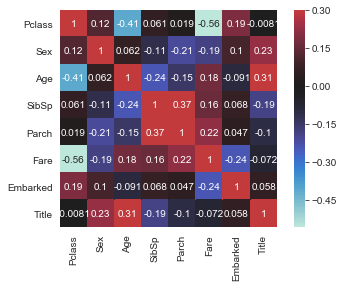

In [26]:
corr = df.corr(method='pearson')
ax = sns.heatmap(corr, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)

# Extract missing ages

In [27]:
missing = df[df['Age'].isnull() == True]
present = df[df['Age'].isnull() == False]

# Linear Regression Model

In [28]:
def lin_model(df, features, random_stat=5):
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['Age'], test_size = 0.2, random_state=5)
    print('train length : %s, test length : %s'%(len(X_train), len(X_test)))
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    print('coef : %s'%reg.coef_)
    print('ms_error : %s'%mean_squared_error(y_test, y_pred))
    print('deter : %s'%r2_score(y_test, y_pred))
    
    plt.plot(np.sort(y_test, axis=0))
    plt.plot(np.sort(y_pred, axis=0), c='red')
    return reg

train length : 836, test length : 209
coef : [-6.51178419e+00  6.57794940e-01 -2.37847321e+00 -9.18703869e-01
  2.88129501e-03 -2.07278404e-01  2.53356826e+00]
ms_error : 175.6821739286609
deter : 0.18336578154555572


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

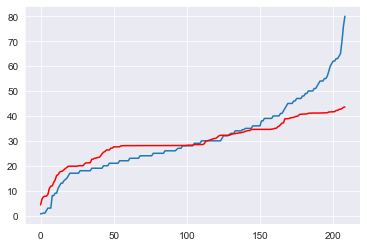

In [29]:
lin_model(present, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'])

train length : 836, test length : 209
coef : [-6.49847112e+00 -2.38339557e+00 -1.01999651e+00  3.21681678e-03
  2.55783588e+00]
ms_error : 176.165718244072
deter : 0.1811180928627859


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

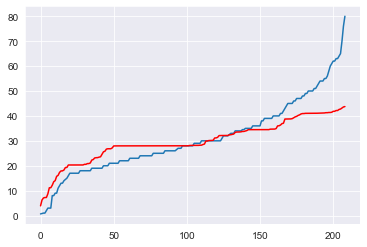

In [30]:
lin_model(present, ['Pclass', 'SibSp', 'Parch', 'Fare', 'Title'])

# Try with band

In [31]:
present['AgeBand'] = pd.cut(present['Age'], 5)
present['AgeBand'] = pd.Categorical(present['AgeBand']).codes
print(present['AgeBand'].unique())
present.head()

[1 2 3 0 4]


C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,3,1,22.0,1,0,7.2500,2,12,1
1,1,0,38.0,1,0,71.2833,0,13,2
2,3,0,26.0,0,0,7.9250,2,9,1
3,1,0,35.0,1,0,53.1000,2,13,2
4,3,1,35.0,0,0,8.0500,2,12,2


# Logistic Regression Model

In [32]:
def log_model(df, features, random_stat=5, C=1e5, solver='lbfgs'):
    
    print('******* Splits lengths *******')
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['AgeBand'], test_size = 0.2, random_state=5)
    print('train length : %s, test length : %s'%(len(X_train), len(X_test)))
    print('******************************')

    clf = LogisticRegression(C=C, solver=solver)
    clf.fit(X_train, y_train)
    pred =  clf.predict(X_test)

    print(clf.score(X_test, y_test))
    
    print('****** Confusion matrix ******')
    M = confusion_matrix(y_test, pred)
    m = [i for i in range(0, len(df['AgeBand'].unique()))]
    print(pd.DataFrame(M, index=m, columns=m))
    print('******************************')
    
    print('******* Sklearn Report *******')
    print(classification_report(y_test, pred)) 
    print('******************************')

In [33]:
log_model(present, ['Pclass', 'SibSp', 'Parch', 'Fare', 'Title'])

******* Splits lengths *******
train length : 836, test length : 209
******************************
0.6028708133971292
****** Confusion matrix ******
    0   1   2  3  4
0  15   5   0  0  0
1   2  97  10  0  0
2   4  34  14  0  0
3   3   9  12  0  0
4   1   0   3  0  0
******************************
******* Sklearn Report *******
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.67      0.89      0.76       109
           2       0.36      0.27      0.31        52
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         4

    accuracy                           0.60       209
   macro avg       0.33      0.38      0.35       209
weighted avg       0.50      0.60      0.54       209

******************************


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
